# T3: Reducción de dimensionalidad y detección de novedades

Nombre: José Luis Cádiz Sejas


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import missingno as msno
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

Data=pd.read_csv('Bba118.csv')
Data=Data[Data["Flujo Descarga"]>=550]
Data=Data.rolling(500).mean().dropna()[1:].reset_index(drop=True)
Data

,Corriente L1,Corriente L2,Corriente L3,Flujo Descarga,T° Desc Bba. LL,T° Desc Bba. LA,T° Desc Mot. LL,T° Desc Mot. LL.1,Prox. Bba. LLX,Prox. Bba. LLY,Prox. Bba. LAX,Prox. Bba. LAY,Prox. Mot. LAX,Prox. Mot. LAY,Prox. Mot LLX,Prox. Mot. LLY
0,271.902221,275.28384,271.798924,949.371757,50.515738,57.744322,69.535964,73.649634,23.596953,9.687941,37.554279,18.313833,14.991219,9.369092,28.173227,9.080312
1,271.893841,275.26534,271.778969,949.297687,50.515138,57.743972,69.535964,73.649634,23.593820,9.688221,37.555009,18.312921,14.990864,9.369473,28.170473,9.080117
2,271.885460,275.25696,271.768969,949.207418,50.514444,57.743531,69.537913,73.649583,23.590686,9.689676,37.557173,18.312006,14.991901,9.369321,28.165169,9.077064
3,271.884160,275.25866,271.758963,949.153465,50.513630,57.743003,69.537933,73.647603,23.587839,9.691708,37.558860,18.311526,14.992175,9.369935,28.160211,9.076616
4,271.893580,275.27080,271.770711,949.256621,50.512817,57.742473,69.537907,73.647603,23.586352,9.693766,37.560379,18.311046,14.992159,9.369660,28.157829,9.075133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26308,272.064115,275.20052,271.983726,933.350173,54.699807,50.855503,70.789624,74.005771,35.950885,17.011440,37.109105,17.927595,15.320423,14.575179,16.054431,14.582226
26309,272.061655,275.18686,271.973526,933.357552,54.698587,50.854230,70.787624,74.003794,35.950095,17.009270,37.111165,17.927685,15.319254,14.574627,16.053450,14.584205
26310,272.059195,275.17320,271.963326,933.391890,54.697380,50.852812,70.785624,74.001805,35.951598,17.008052,37.113195,17.927042,15.316578,14.574344,16.052370,14.585085
26311,272.056735,275.18028,271.964806,933.447465,54.696166,50.851569,70.783681,73.999805,35.953215,17.006810,37.115205,17.926405,15.315682,14.574141,16.052326,14.586041


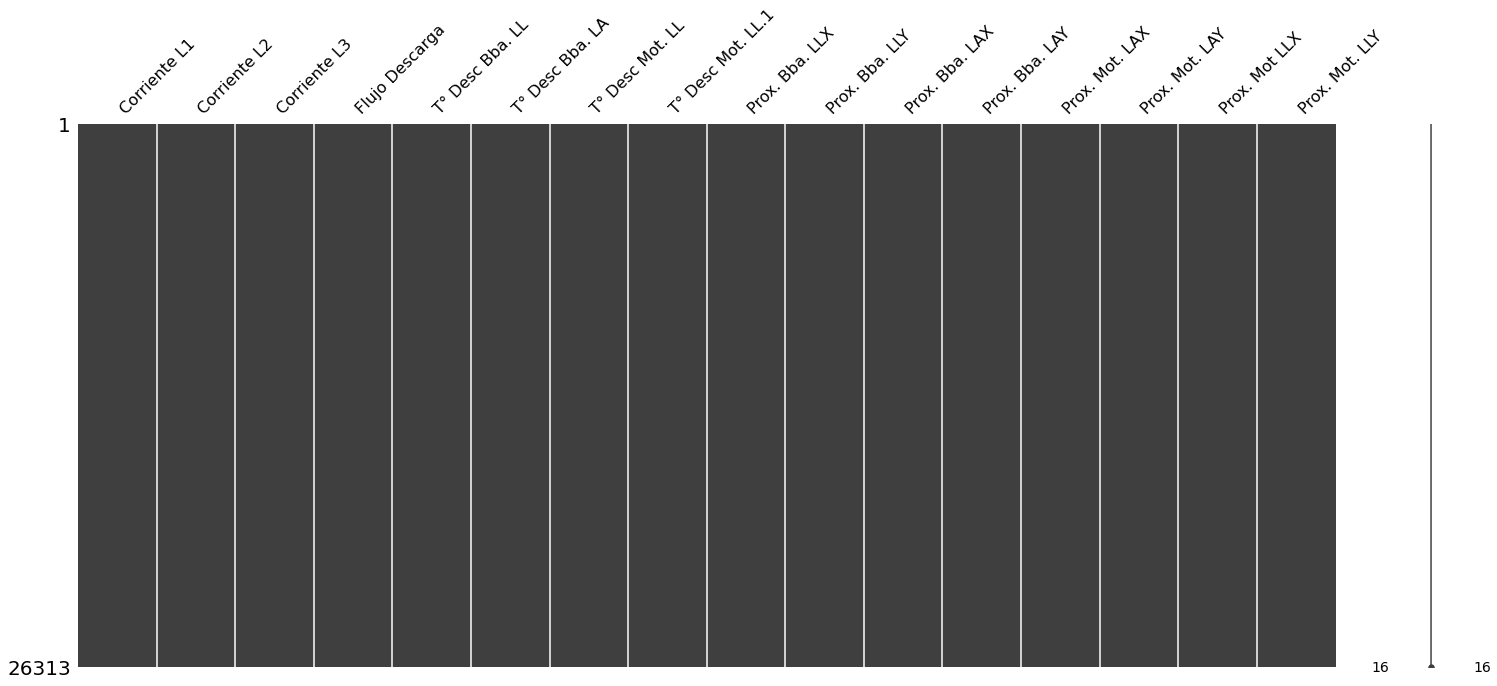

In [127]:
# Analisis de valores faltantes
# Missings
msno.matrix(Data)
plt.show()

In [128]:
# Númericamente
Data.isnull().sum()

Corriente L1         0
Corriente L2         0
Corriente L3         0
Flujo Descarga       0
T° Desc Bba. LL      0
T° Desc Bba. LA      0
T° Desc Mot. LL      0
T° Desc Mot. LL.1    0
Prox. Bba. LLX       0
Prox. Bba. LLY       0
Prox. Bba. LAX       0
Prox. Bba. LAY       0
Prox. Mot. LAX       0
Prox. Mot. LAY       0
Prox. Mot LLX        0
Prox. Mot. LLY       0
dtype: int64

Se observa que no existen valores faltantes

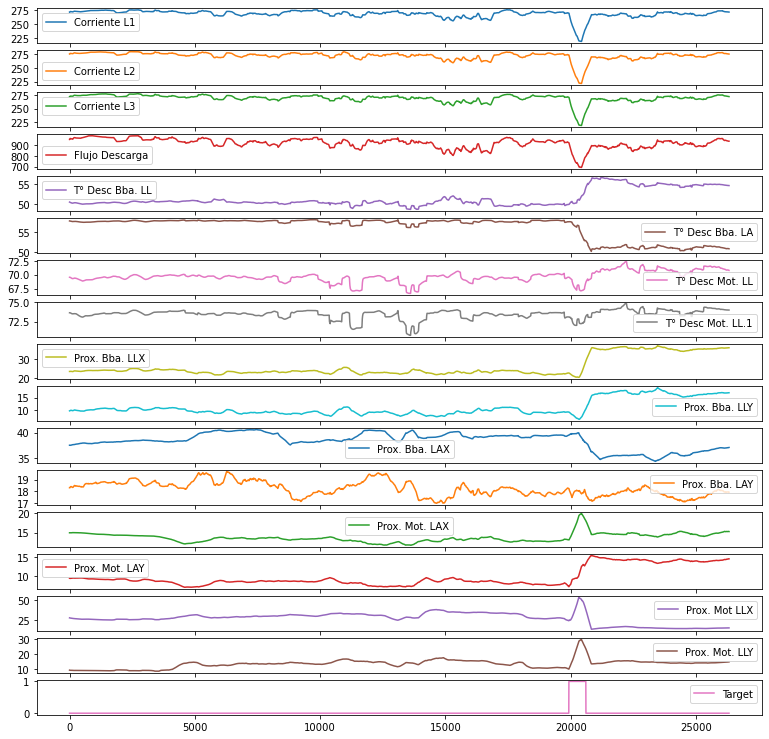

In [129]:
# Data train (sana) y test
Xtrain=Data[0:19920].copy()
Xtest=Data.copy()

#etiqueta y visualización horizonte temporal
Yt=np.zeros((26313,1))
Yt[19920:20600]=1

# En df Data se iran almacenando las predicciones
Data["Target"]=Yt

#Visualización de data sana
Data.plot(subplots=True,figsize=(13,13))
plt.show()

In [130]:
# Modelo base de referencia
outlier_frac=0.01 
Model= EllipticEnvelope(contamination=outlier_frac)
title='Elliptic Envelope'
Model.fit(Xtrain)
Data["Predict_Elliptic_Envelope"]=Model.predict(Xtest)
Data["Predict_Elliptic_Envelope"].replace({-1:1,1:0},inplace=True)

# Reporte
print(classification_report(Data["Target"],Data["Predict_Elliptic_Envelope"]))

# Metrica a optimizar F1 al incoporar Precision y Recall
F1score=f1_score(Data["Target"],Data["Predict_Elliptic_Envelope"])
print(F1score)


              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     25633
         1.0       0.09      0.86      0.16       680

    accuracy                           0.77     26313
   macro avg       0.54      0.82      0.52     26313
weighted avg       0.97      0.77      0.85     26313

0.16376549227127138


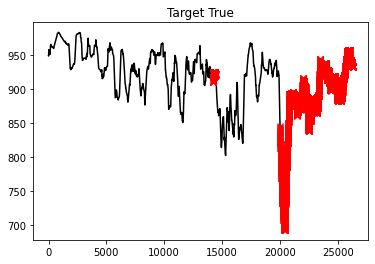

In [131]:
# Detección Base
t=np.arange(0,len(Data))
Xp0=Data[Data["Predict_Elliptic_Envelope"]==0]["Flujo Descarga"]      
Xp1=Data[Data["Predict_Elliptic_Envelope"]==1]["Flujo Descarga"]  
t0=t[Data["Predict_Elliptic_Envelope"]==0]    
t1=t[Data["Predict_Elliptic_Envelope"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("Target True")
plt.show()

# Parte a): Reducción de dimensionalidad y tunning de hiperparámetros

**Reducción de dimensión**: Para cada método probaremos un modelo base (EllipticEnvelope) para ver con que método se obtienen mejores resultados

Filtro de baja varianza (Selección de parámetros)

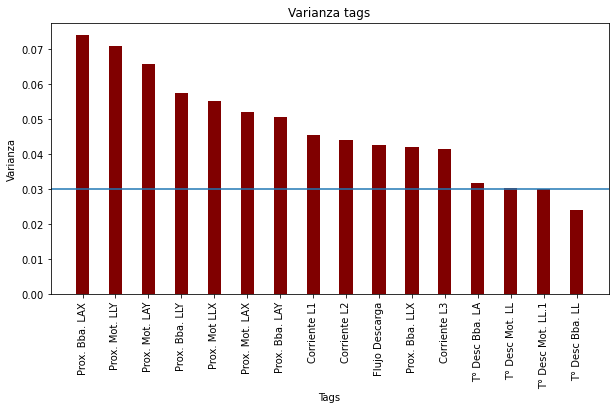

In [132]:
# Filtro de varianza mayor a 0.02, solo se hace uso de la data sana
vars=pd.DataFrame(MinMaxScaler().fit_transform(Xtrain),columns=Xtrain.columns).var(axis=0).sort_values(ascending=False)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(vars.index,vars, color ='maroon',width = 0.4,)
plt.xticks(rotation='vertical')
plt.axhline(y=0.03)
plt.xlabel("Tags")
plt.ylabel("Varianza")
plt.title("Varianza tags")
plt.show()


In [133]:
tags_varianza=list(vars.index[0:13])
tags_varianza

['Prox. Bba. LAX',
 'Prox. Mot. LLY',
 'Prox. Mot. LAY',
 'Prox. Bba. LLY',
 'Prox. Mot LLX',
 'Prox. Mot. LAX',
 'Prox. Bba. LAY',
 'Corriente L1',
 'Corriente L2',
 'Flujo Descarga',
 'Prox. Bba. LLX',
 'Corriente L3',
 'T° Desc Bba. LA']

Filtro de alta correlación (Selección de parámetros)

In [134]:
# Visualización de correlación
df_corr=Xtrain.corr()
df_corr

,Corriente L1,Corriente L2,Corriente L3,Flujo Descarga,T° Desc Bba. LL,T° Desc Bba. LA,T° Desc Mot. LL,T° Desc Mot. LL.1,Prox. Bba. LLX,Prox. Bba. LLY,Prox. Bba. LAX,Prox. Bba. LAY,Prox. Mot. LAX,Prox. Mot. LAY,Prox. Mot LLX,Prox. Mot. LLY
Corriente L1,1.000000,0.980004,0.978278,0.980854,-0.284946,0.211207,0.210535,0.230599,0.478454,0.435084,-0.451759,0.266232,0.133253,-0.117716,-0.602377,-0.641508
Corriente L2,0.980004,1.000000,0.980801,0.980388,-0.313670,0.185045,0.185677,0.192520,0.491206,0.452281,-0.395377,0.322204,0.156849,-0.106720,-0.616946,-0.637099
Corriente L3,0.978278,0.980801,1.000000,0.982079,-0.281492,0.229201,0.232118,0.229131,0.435466,0.462014,-0.361687,0.365084,0.150534,-0.150971,-0.664733,-0.691708
Flujo Descarga,0.980854,0.980388,0.982079,1.000000,-0.266553,0.185949,0.182106,0.196963,0.502645,0.466775,-0.423421,0.366655,0.182984,-0.107624,-0.673757,-0.690584
T° Desc Bba. LL,-0.284946,-0.313670,-0.281492,-0.266553,1.000000,0.689178,0.641051,0.692655,-0.014596,0.010002,0.045582,0.034369,0.239472,0.241104,0.163518,0.115650
T° Desc Bba. LA,0.211207,0.185045,0.229201,0.185949,0.689178,1.000000,0.963133,0.970047,0.037455,0.179779,0.034799,0.043351,0.161359,0.014138,-0.082500,-0.169435
T° Desc Mot. LL,0.210535,0.185677,0.232118,0.182106,0.641051,0.963133,1.000000,0.952625,0.065584,0.257712,0.037953,0.020442,0.149359,0.020472,-0.072909,-0.203187
T° Desc Mot. LL.1,0.230599,0.192520,0.229131,0.196963,0.692655,0.970047,0.952625,1.000000,0.102182,0.223958,-0.077766,0.001872,0.243580,0.127131,-0.059267,-0.202617
Prox. Bba. LLX,0.478454,0.491206,0.435466,0.502645,-0.014596,0.037455,0.065584,0.102182,1.000000,0.800461,-0.490561,0.182914,0.325873,0.214984,-0.210478,-0.303733
Prox. Bba. LLY,0.435084,0.452281,0.462014,0.466775,0.010002,0.179779,0.257712,0.223958,0.800461,1.000000,-0.288746,0.372294,0.313972,0.043268,-0.311891,-0.466729


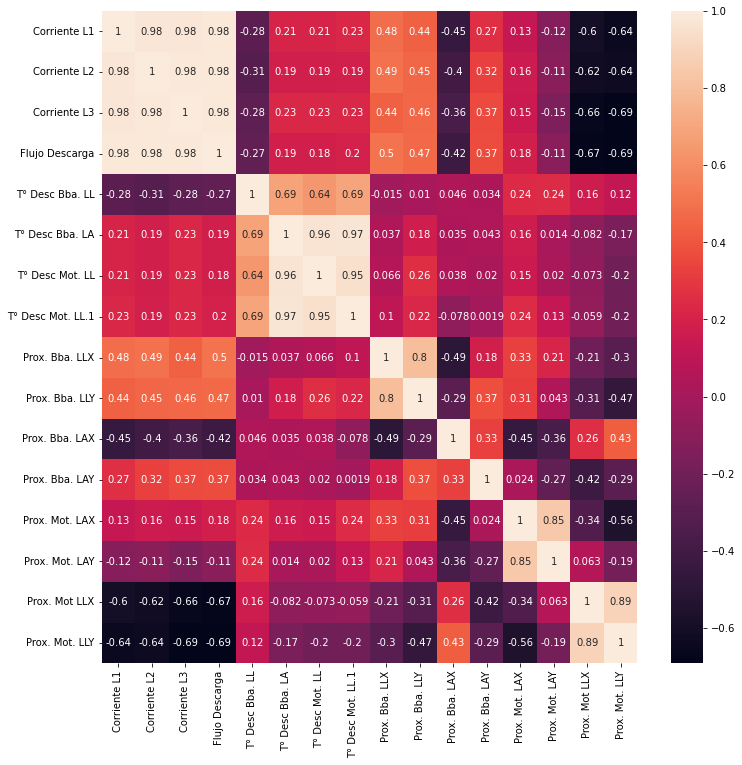

In [135]:
# Visualización
fig = plt.figure(figsize=(12,12))
sns.heatmap(df_corr,annot=True)
plt.show()


In [136]:
# Función que filtra tags por alta correlación
def corrkill(dataframe, features, corr_cut=0.9):

    df = dataframe[features]
    dfcorr = pd.DataFrame(np.triu(df.corr()), columns=df.columns, index=df.columns)
    dfcorr = dfcorr.stack().reset_index()
    dfcorr.columns = ['Feat1','Feat2','Val']
    dfcorr = dfcorr[~dfcorr['Val'].isin([0,1])]
    dfcorr = dfcorr[dfcorr['Val'].abs()>corr_cut]
    dfcorr["Val"]=dfcorr["Val"].abs()
    
    return list(dfcorr['Feat2']), dfcorr

In [137]:
# Se obtienen tags altamente correlacionados y matriz que permite visualizar cuales son los par de tags altamente correlacionados
collinearity, table_cor=corrkill(Xtrain,Xtrain.columns
)

In [138]:
# Tags altamente correlacionados
table_cor

,Feat1,Feat2,Val
1,Corriente L1,Corriente L2,0.980004
2,Corriente L1,Corriente L3,0.978278
3,Corriente L1,Flujo Descarga,0.980854
18,Corriente L2,Corriente L3,0.980801
19,Corriente L2,Flujo Descarga,0.980388
35,Corriente L3,Flujo Descarga,0.982079
86,T° Desc Bba. LA,T° Desc Mot. LL,0.963133
87,T° Desc Bba. LA,T° Desc Mot. LL.1,0.970047
103,T° Desc Mot. LL,T° Desc Mot. LL.1,0.952625


In [139]:
# Tags elegidos
tag_select = [i for i in Xtrain.columns if i not in collinearity]
tag_select

['Corriente L1',
 'T° Desc Bba. LL',
 'T° Desc Bba. LA',
 'Prox. Bba. LLX',
 'Prox. Bba. LLY',
 'Prox. Bba. LAX',
 'Prox. Bba. LAY',
 'Prox. Mot. LAX',
 'Prox. Mot. LAY',
 'Prox. Mot LLX',
 'Prox. Mot. LLY']

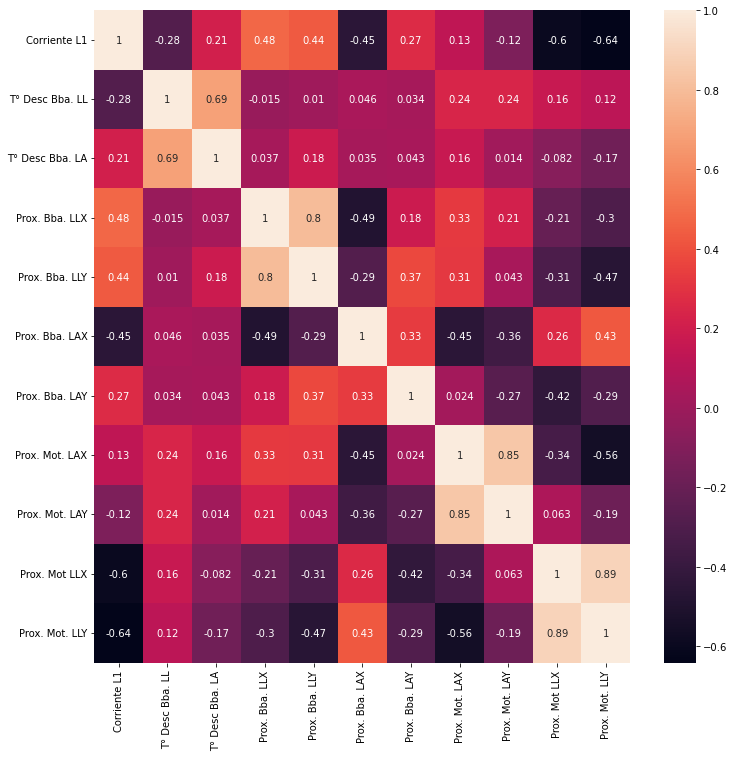

In [140]:
# Visualización
fig = plt.figure(figsize=(8,6))
sns.heatmap(Xtrain[tag_select].corr(),annot=True)
fig.set_size_inches(12, 12) 

Se observa una menor correlación entre las variables

PCA (Extracción de parámetros)

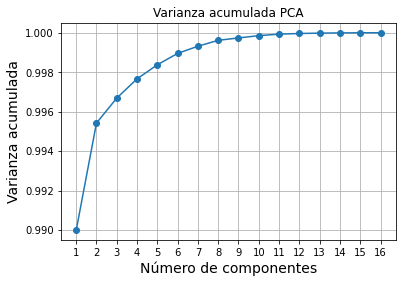

In [141]:
#Determinar el número de componentes con PCA
pca = PCA(n_components=16)
pca.fit(Xtrain)
varianza=pca.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(np.arange(1,17),varianza,'-o')
plt.xlabel('Número de componentes', fontsize=14)
plt.ylabel('Varianza acumulada', fontsize=14)
plt.title("Varianza acumulada PCA")
plt.xticks(np.arange(1,17))
plt.grid()

Se observa que solo con 3 componentes principales ya se cuenta con casi  el 100% de la información

# Selección del mejor método de reducción de dimensión

Filtro de varianza

In [142]:
# Modelo base de referencia
outlier_frac=0.01 
Model= EllipticEnvelope(contamination=outlier_frac)
Model.fit(Xtrain[tags_varianza])
Yp=pd.DataFrame(Model.predict(Xtest[tags_varianza]),columns=["Predict"]).replace({-1:1,1:0})
F1score=f1_score(Data["Target"],Yp["Predict"])
F1score


0.16274209279643304

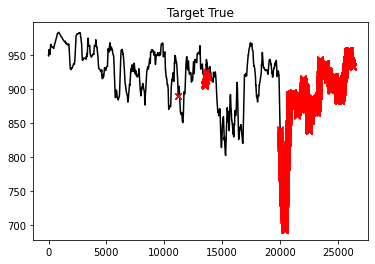

In [143]:
# Detección Base
t=np.arange(0,len(Data))
Xp0=Data[Yp["Predict"]==0]["Flujo Descarga"]      
Xp1=Data[Yp["Predict"]==1]["Flujo Descarga"]  
t0=t[Yp["Predict"]==0]    
t1=t[Yp["Predict"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("Target True")
plt.show()

Filtro de alta correlación

In [144]:
# Modelo base de referencia
outlier_frac=0.01 
Model= EllipticEnvelope(contamination=outlier_frac)
Model.fit(Xtrain[tag_select])
Yp=pd.DataFrame(Model.predict(Xtest[tag_select]),columns=["Predict"]).replace({-1:1,1:0})
F1score=f1_score(Data["Target"],Yp["Predict"])
F1score

0.1617175519308518

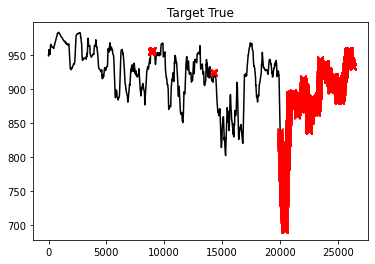

In [145]:
# Detección Base
t=np.arange(0,len(Data))
Xp0=Data[Yp["Predict"]==0]["Flujo Descarga"]      
Xp1=Data[Yp["Predict"]==1]["Flujo Descarga"]  
t0=t[Yp["Predict"]==0]    
t1=t[Yp["Predict"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("Target True")
plt.show()

PCA

In [146]:
pca=PCA(n_components=3)
Data_PCA_train=pca.fit_transform(Xtrain)
Data_PCA_test=pca.transform(Xtest)
Data_PCA_train

array([[-24.91400042,  -2.3422628 ,  -2.42511302],
       [-24.83640939,  -2.3509988 ,  -2.42555938],
       [-24.74550206,  -2.36312543,  -2.42511844],
       ...,
       [  3.6130833 ,  -6.0736781 ,   1.82559658],
       [  3.74327696,  -6.08562238,   1.82767265],
       [  3.88110307,  -6.09932219,   1.83029408]])

In [147]:
# Modelo base de referencia
outlier_frac=0.01 
Model= EllipticEnvelope(contamination=outlier_frac)
Model.fit(Data_PCA_train)
Yp=pd.DataFrame(Model.predict(Data_PCA_test),columns=["Predict"]).replace({-1:1,1:0})
F1score=f1_score(Data["Target"],Yp["Predict"])
F1score

0.1464717458532471

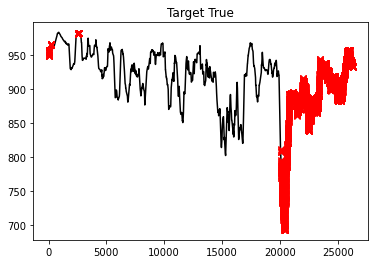

In [148]:
# Detección Base
t=np.arange(0,len(Data))
Xp0=Data[Yp["Predict"]==0]["Flujo Descarga"]      
Xp1=Data[Yp["Predict"]==1]["Flujo Descarga"]  
t0=t[Yp["Predict"]==0]    
t1=t[Yp["Predict"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("Target True")
plt.show()

**Finalmente el método de reducción será Filtro de baja varianza debido a que entrega un F1 mayor.**

In [25]:
# Selección de variables
Xtrain=Xtrain[tags_varianza]
Xtest=Xtest[tags_varianza]

# Busqueda de mejores hiperparámetros para cada modelo

**Modelo EllipticEnvelope**

In [26]:
# Grid
list_outlier_frac=[0.001,0.01,0.015,0.018,0.02,0.021,0.024,0.027,0.03,0.04]
list_f1=[]
for i in list_outlier_frac:
    Model= EllipticEnvelope(contamination=i)
    Model.fit(Xtrain)
    Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
    F1score=f1_score(Data["Target"],Yp["Predict"])
    list_f1.append(F1score)
    print(i,F1score)

0.001 0.1765709411430196
0.01 0.17393712782163134
0.015 0.1670775130101342
0.018 0.1664630006788866
0.02 0.1687786465354543
0.021 0.1646234676007005
0.024 0.16746666666666668
0.027 0.16664462372702027
0.03 0.16509186351706034
0.04 0.16159549987215546


Best Factor 0.001


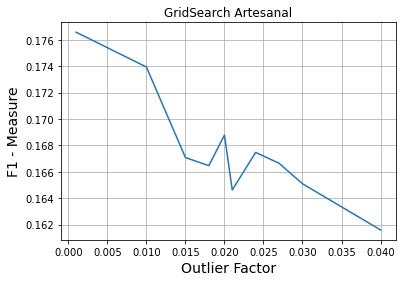

In [27]:
# Plot
plt.plot(list_outlier_frac,list_f1)
plt.title('GridSearch Artesanal')
plt.xlabel('Outlier Factor', fontsize=14)
plt.ylabel('F1 - Measure', fontsize=14)
plt.grid()
print(f'Best Factor {list_outlier_frac[np.argmax(list_f1)]}')

**Isolation Forest**

In [31]:
# Grid, Estimators: 10,100,500,1000
list_outlier_frac=[0.001,0.01,0.015,0.018,0.02,0.021,0.024,0.027,0.03,0.04]
list_f1=[]
for i in list_outlier_frac:
    Model= IsolationForest(n_estimators=100, max_samples='auto', contamination=i)
    Model.fit(Xtrain)
    Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
    F1score=f1_score(Data["Target"],Yp["Predict"])
    list_f1.append(F1score)
    print(i,F1score)

0.001 0.31074829931972797
0.01 0.20846788661643342
0.015 0.16958424507658643
0.018 0.16795550128883463
0.02 0.16659916295396246
0.021 0.16585891222401722
0.024 0.1655098772023492
0.027 0.16326530612244897
0.03 0.16228300894266176
0.04 0.15924219150025598


Best Factor 0.001


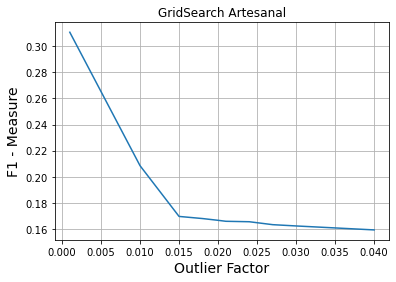

In [32]:
# Plot
plt.plot(list_outlier_frac,list_f1)
plt.title('GridSearch Artesanal')
plt.xlabel('Outlier Factor', fontsize=14)
plt.ylabel('F1 - Measure', fontsize=14)
plt.grid()
print(f'Best Factor {list_outlier_frac[np.argmax(list_f1)]}')

**LocalOutlierFactor**

In [57]:
# Grid, neighbors: 10,20,700,1000,2000
list_outlier_frac=[0.001,0.01,0.015,0.018,0.02,0.021,0.024,0.027,0.03,0.04]
list_f1=[]
for i in list_outlier_frac:
    Model= LocalOutlierFactor(n_neighbors=1000, contamination=i,novelty=True)
    Model.fit(Xtrain)
    Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
    F1score=f1_score(Data["Target"],Yp["Predict"])
    list_f1.append(F1score)
    print(i,F1score)

0.001 0.15943933420937365
0.01 0.16696813691387227
0.015 0.16614119259766966
0.018 0.16532970768184907
0.02 0.1644799134316245
0.021 0.16396979503775622
0.024 0.1633253140871425
0.027 0.16204747380983958
0.03 0.16199868507560813
0.04 0.162321063394683


Best Factor 0.01


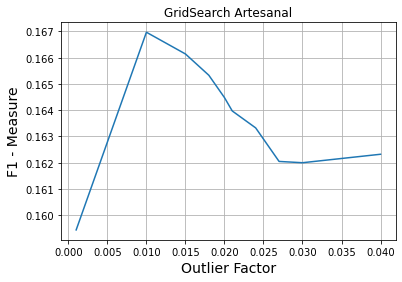

In [58]:
# Plot
plt.plot(list_outlier_frac,list_f1)
plt.title('GridSearch Artesanal')
plt.xlabel('Outlier Factor', fontsize=14)
plt.ylabel('F1 - Measure', fontsize=14)
plt.grid()
print(f'Best Factor {list_outlier_frac[np.argmax(list_f1)]}')

**OneClassSVM**

In [54]:
# Grid
list_nu=np.linspace(0.02,0.1,10)
list_f1=[]
for i in list_nu:
    Model= svm.OneClassSVM(nu=i, gamma='auto')
    Model.fit(Xtrain)
    Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
    F1score=f1_score(Data["Target"],Yp["Predict"])
    list_f1.append(F1score)
    print(i,F1score)

0.02 0.17984660142819361
0.028888888888888888 0.1764171747308341
0.03777777777777778 0.17280813214739515
0.04666666666666666 0.16959720663424369
0.05555555555555555 0.16573239093346334
0.06444444444444444 0.1621557171813521
0.07333333333333333 0.15921329899321005
0.08222222222222222 0.1559811905034981
0.09111111111111111 0.1529808773903262
0.1 0.1497797356828194


Best Factor 0.02


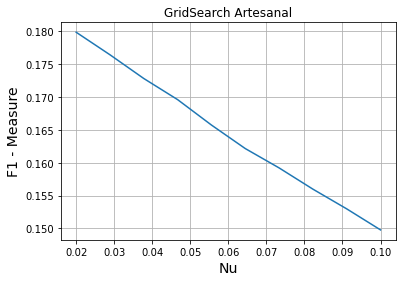

In [56]:
# Plot
plt.plot(list_nu,list_f1)
plt.title('GridSearch Artesanal')
plt.xlabel('Nu', fontsize=14)
plt.ylabel('F1 - Measure', fontsize=14)
plt.grid()
print(f'Best Factor {list_nu[np.argmax(list_f1)]}')

# Parte b): Implementación de modelos optimizados

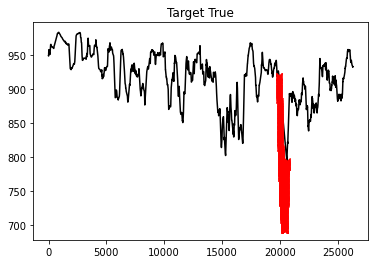

In [149]:
# Target real
t=np.arange(0,len(Data))
Xp0=Data[Data["Target"]==0]["Flujo Descarga"]      
Xp1=Data[Data["Target"]==1]["Flujo Descarga"]  
t0=t[Data["Target"]==0]    
t1=t[Data["Target"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("Target True")
plt.show()

**Modelo EllipticEnvelope**

In [150]:
Model= EllipticEnvelope(contamination=0.001)
Model.fit(Xtrain)
Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
Data["Predict_Elliptic_Envelope"]=Yp
F1score=f1_score(Data["Target"],Yp["Predict"])
F1score

0.16483044784661613

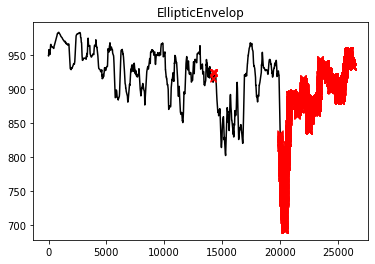

In [151]:
t=np.arange(0,len(Data))
Xp0=Data[Data["Predict_Elliptic_Envelope"]==0]["Flujo Descarga"]      
Xp1=Data[Data["Predict_Elliptic_Envelope"]==1]["Flujo Descarga"]  
t0=t[Data["Predict_Elliptic_Envelope"]==0]    
t1=t[Data["Predict_Elliptic_Envelope"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("EllipticEnvelop")
plt.show()

**Isolation Forest**

In [152]:
Model= IsolationForest(n_estimators=100, max_samples='auto', contamination= 0.001)
Model.fit(Xtrain)
Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
Data["Predict_Isolation_Forest"]=Yp
F1score=f1_score(Data["Target"],Yp["Predict"])
F1score

0.16233470132238942

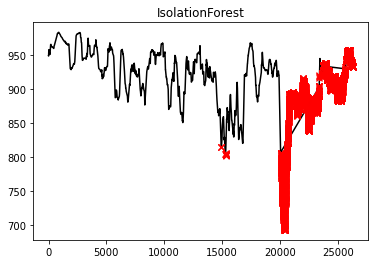

In [153]:
t=np.arange(0,len(Data))
Xp0=Data[Data["Predict_Isolation_Forest"]==0]["Flujo Descarga"]      
Xp1=Data[Data["Predict_Isolation_Forest"]==1]["Flujo Descarga"]  
t0=t[Data["Predict_Isolation_Forest"]==0]    
t1=t[Data["Predict_Isolation_Forest"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("IsolationForest")
plt.show()

**LocalOutlierFactor**

In [154]:
Model= LocalOutlierFactor(n_neighbors=1000, contamination= 0.01,novelty=True)
Model.fit(Xtrain)
Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
Data["Predict_Local_Outlier"]=Yp
F1score=f1_score(Data["Target"],Yp["Predict"])
F1score

0.16666666666666669

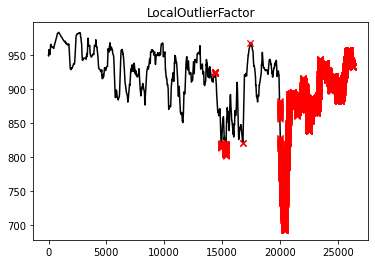

In [155]:
t=np.arange(0,len(Data))
Xp0=Data[Data["Predict_Local_Outlier"]==0]["Flujo Descarga"]      
Xp1=Data[Data["Predict_Local_Outlier"]==1]["Flujo Descarga"]  
t0=t[Data["Predict_Local_Outlier"]==0]    
t1=t[Data["Predict_Local_Outlier"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("LocalOutlierFactor")
plt.show()

**OneClassSVM**

In [156]:
Model= svm.OneClassSVM(nu=0.02, gamma='auto')
Model.fit(Xtrain)
Yp=pd.DataFrame(Model.predict(Xtest),columns=["Predict"]).replace({-1:1,1:0})
Data["Predict_SVM"]=Yp
F1score=f1_score(Data["Target"],Yp["Predict"])
F1score


0.18003706645485834

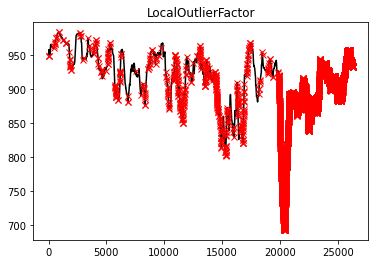

In [157]:
t=np.arange(0,len(Data))
Xp0=Data[Data["Predict_SVM"]==0]["Flujo Descarga"]      
Xp1=Data[Data["Predict_SVM"]==1]["Flujo Descarga"]  
t0=t[Data["Predict_SVM"]==0]    
t1=t[Data["Predict_SVM"]==1]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title("LocalOutlierFactor")
plt.show()


---------------

**Respuesta**:  Se observa que todos los modelos identifican como anomalía todo el bloque que no le fue mostrado en el entrenamiento, por lo que solamente hay que centrarse en si la detecciones de anomalías dentro del conjunto de entrenamiento es consistente con la falla. SVM se descarta automáticamente al detectar prácticamente todo el horizonte temporal como anómalo. Por otro lado, EllipticEnvelope detecta una anomalía cuando va a comenzar la caida que no es anómala. IsolationForest detecta la caida brusca de la señal, la cual podría llegar a ser un indicio de que vendrá una caida más fuerte, pero finalmente se puede observar que LocalOutlierFactor es capaz de detectar el inicio de la primera caida (no anómalo) y luego la caida, la cual aparentemente desencadena posteriormente la caida que efectivamente es anómala. Con esto se determina que el mejor modelo para este contexto es el LocalOutlierFactor.

-----

# Parte c): ¿Es posible detectar la falla con anticipación?

In [171]:
# Se vuelven a leer los datos para recuperar la columna de fecha acorde a los filtros y suavizamientos
Data_fecha=pd.read_csv('Bba118.csv').rename(columns={"Unnamed: 0":"Fecha"})
Fechas=pd.to_datetime(Data_fecha[Data_fecha["Flujo Descarga"]>=550][500:]["Fecha"].reset_index(drop=True))

In [173]:
# Primera fecha de detección de falla
detec_anomalia=min(Fechas[Data["Predict_Local_Outlier"]==1])
detec_anomalia

Timestamp('2018-12-23 07:57:25.000012800')

In [174]:
# Fecha real de la fall
fecha_anomalia=min(Fechas[Data["Target"]==1])
fecha_anomalia

Timestamp('2019-01-07 03:04:55.000012800')

In [177]:
print(f'Anticipación de la anomalía: {(fecha_anomalia-detec_anomalia).days} días')

Anticipación de la anomalía: 14 días


# A partir de las fechas calculadas se observa que la falla se puede anticipar con dos semanas de anticipación apróximadamente.

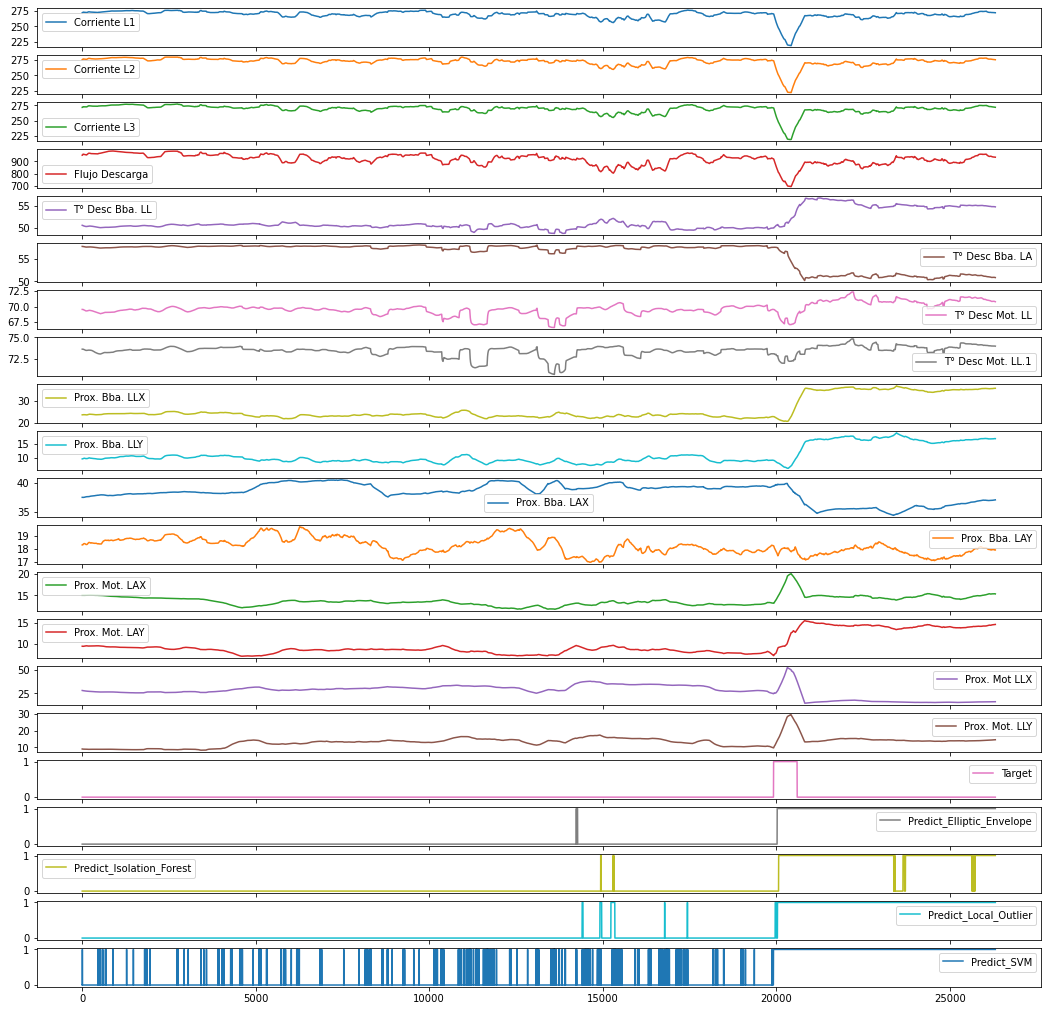

In [169]:
# Visualización adicional de la detección de anomalías de todos los modelos entrenados
Data.plot(subplots=True,figsize=(18,18))
plt.show()